#### Project Title: Analyzing Bank Customer Data for Fraud Detection.

#### Problem Description / Objectives: The Project is aimed at identifying the key drivers that determine the likelihood of fraud and predicting the fraudulent transactions for the banking customers.

#### Dataset Description: The dataset consists of payments made by different customers at different time period and of varying amounts. The dataset contains 9 features and a target column.
Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
Customer: Customer id,
zipCodeOrigin:The zip code of origin/source,
Merchant: The merchant's id,
zipMerchant: The merchant's zip code,
Age: Categorized age
        0: <= 18,
        1: 19-25,
        2: 26-35,
        3: 36-45,
        4: 46:55,
        5: 56:65,
        6: > 65
        U: Unknown,
Gender: Gender for customer
        E : Enterprise,
        F: Female,
        M: Male,
        U: Unknown,
Category: Category of the purchase,
Amount: Amount of the purchase,
Fraud: Target variable which shows if the transaction is fraudulent(1) or not fraudulent(0).

In [388]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [389]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [390]:
df_entire = pd.read_csv('C:/Users/chowd/Desktop/Dataset/bs140513_032310.csv')

In [391]:
# Selecting the first 30000 rows (It's a big dataset, hence selected the first 30K observations to enhance PC Performance)
df = df_entire.head(30000)

In [392]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         30000 non-null  int64  
 1   customer     30000 non-null  object 
 2   age          30000 non-null  object 
 3   gender       30000 non-null  object 
 4   zipcodeOri   30000 non-null  object 
 5   merchant     30000 non-null  object 
 6   zipMerchant  30000 non-null  object 
 7   category     30000 non-null  object 
 8   amount       30000 non-null  float64
 9   fraud        30000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [394]:
# Checking for null values
pd.DataFrame(df.isnull().sum(), columns = ['Count of missing values'])

,Count of missing values
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [395]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,30000.0,5.510900,3.407512,0.00,3.0000,6.00,8.00,11.00
amount,30000.0,40.590088,140.445935,0.01,13.8475,26.95,43.01,7432.48
fraud,30000.0,0.015467,0.123402,0.00,0.0000,0.00,0.00,1.00


#### The average value for the amount is 40.59, standard deviation is 140.44 and the maximum value of the transaction is 7432.48.

In [397]:
# Checking for duplicate values
df[df.duplicated()]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud


In [398]:
# Getting the column names
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

#### After an initial analysis of the dataset we find there are no missing, duplicate or null values.

#### Exploratory Data Analysis:

#### Analyzing the Dependent Variable, 'Fraud'

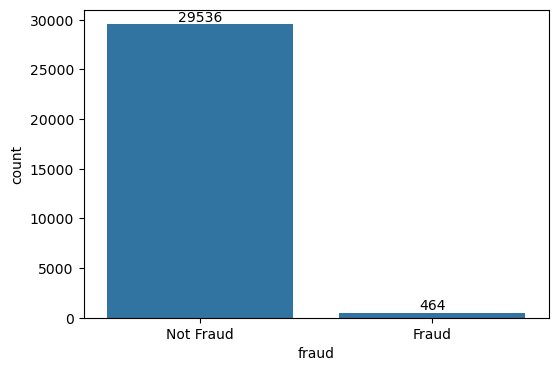

In [402]:
# Visualizing the target variable 'Fraud'
plt.figure(figsize = (6,4))
a = sns.countplot(x ='fraud',data=df)
for label in a.containers:
    a.bar_label(label)
plt.xticks([0,1], labels=['Not Fraud','Fraud'])
plt.show()

In [403]:
df['fraud'].value_counts()

fraud
0    29536
1      464
Name: count, dtype: int64

#### We see that both the classes are disproportionate and hence we have an imbalanced dataset

#### Analyzing the Independent Variables/ Features & Exploratory Data Analysis:

#### Categorical Variables:

In [407]:
df['age'].value_counts()

age
'2'    9521
'3'    7323
'4'    5385
'5'    3283
'1'    3014
'6'    1321
'0'     109
'U'      44
Name: count, dtype: int64

In [408]:
df['gender'].value_counts()

gender
'F'    16448
'M'    13477
'E'       44
'U'       31
Name: count, dtype: int64

In [409]:
df['zipcodeOri'].value_counts()

zipcodeOri
'28007'    30000
Name: count, dtype: int64

In [410]:
# Plotting the Categorical Features 'Age' and 'Gender'
categorical_features= ['age','gender']
df_cat = df[categorical_features]

int64


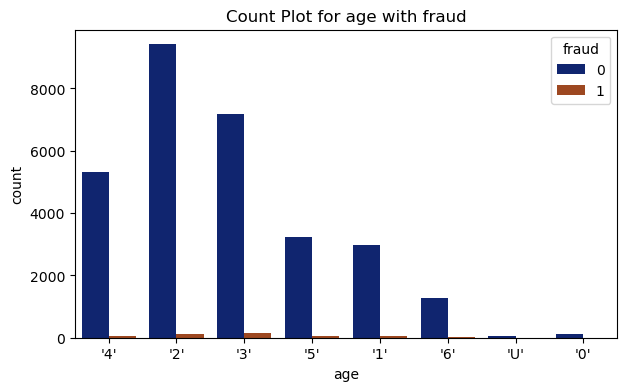

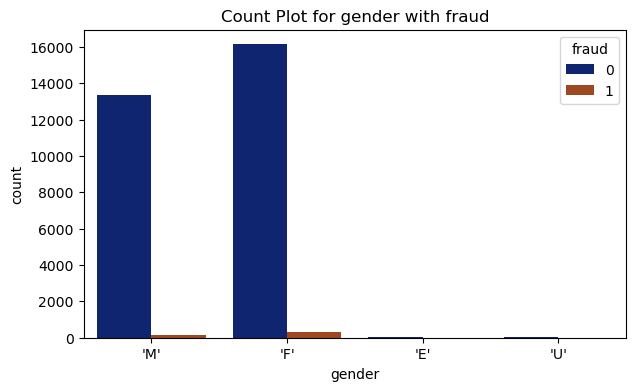

In [411]:
# Checking the data type of 'fraud' column
print(df['fraud'].dtype)
# Converting the 'fraud' column to string type if needed
df['fraud']= df['fraud'].astype(str)
for col in categorical_features:
    plt.figure(figsize = (7,4))
    sns.countplot(x= col, hue= df['fraud'],data = df_cat, palette = 'dark')
    plt.title(f'Count Plot for {col} with fraud')
    plt.show()

In [412]:
# Number of fraud and non-fraud cases per age group:
pd.crosstab(df['age'],df['fraud'])

fraud,0,1
age,,
'0',105,4
'1',2970,44
'2',9414,107
'3',7172,151
'4',5317,68
'5',3228,55
'6',1286,35
'U',44,0


#### We observe that the highest number of fraud cases are for age group '2' : 26-35 yrs, '3': 36-45 yrs, '4': 46-55 yrs.

In [414]:
# Number of fraud and non-fraud cases per gender:
pd.crosstab(df['gender'],df['fraud'])

fraud,0,1
gender,,
'E',44,0
'F',16133,315
'M',13328,149
'U',31,0


#### We observe that the highest number of fraud cases are for Female & Male for the gender categorical variable.

In [416]:
# Analyzing the categorical variable 'merchant':
crosstab_merchant = pd.crosstab(df['merchant'],df['fraud'])
print(crosstab_merchant)

fraud              0    1
merchant                 
'M1053599405'    186    0
'M117188757'       1    0
'M1198415165'     99   20
'M1294758098'      1   16
'M1313686961'     16    0
'M1352454843'     28    0
'M1353266412'      1    2
'M1400236507'     12    0
'M1416436880'      1    0
'M151143676'     633   14
'M1535107174'    210   10
'M1600850729'    156    0
'M1649169323'     90    4
'M17379832'        2   10
'M1741626453'     53   12
'M1748431652'      7    6
'M1788569036'      1    0
'M1823072687'   6201    0
'M1842530320'     74    0
'M1872033263'     41    0
'M1873032707'      8    0
'M1888755466'     86   18
'M1913465890'     17    0
'M1946091778'    103    0
'M2011752106'     12    6
'M2080407379'      1    8
'M209847108'     318   18
'M2122776122'     17   12
'M348875670'      11    0
'M348934600'   19231    0
'M349281107'      83    0
'M3697346'         2   32
'M45060432'       10    0
'M480139044'     226   88
'M495352832'       9    6
'M50039827'       42    2
'M547558035'

In [417]:
# Average number of frauds taking place across the different merchants:
crosstab_merchant['1'].mean()

9.666666666666666

In [418]:
# Analyzing merchants having higher number of frauds ( above average)
conditioned_crosstab = crosstab_merchant[crosstab_merchant['1'] > 9.6666]
sorted_df = conditioned_crosstab.sort_values(by= '1' , ascending=False)
# Printing the sorted DataFrame
print(sorted_df)

fraud            0    1
merchant               
'M980657600'    35  108
'M480139044'   226   88
'M3697346'       2   32
'M732195782'     7   22
'M1198415165'   99   20
'M1888755466'   86   18
'M209847108'   318   18
'M1294758098'    1   16
'M151143676'   633   14
'M855959430'   554   14
'M1741626453'   53   12
'M2122776122'   17   12
'M1535107174'  210   10
'M17379832'      2   10
'M840466850'    53   10
'M923029380'    37   10


#### We observe that the highest number of fraudulent transactions across all the merchants are for merchants 'M980657600' : 108 & 'M480139044': 88.

In [420]:
# Calculating percentages
percentage_result_merchant = conditioned_crosstab.apply(lambda row: row / row.sum() * 100, axis=1)
sorted_df_merchant = percentage_result_merchant.sort_values(by= '1' , ascending=False)
# Printing the sorted DataFrame
print(sorted_df_merchant)

fraud                  0          1
merchant                           
'M1294758098'   5.882353  94.117647
'M3697346'      5.882353  94.117647
'M17379832'    16.666667  83.333333
'M732195782'   24.137931  75.862069
'M980657600'   24.475524  75.524476
'M2122776122'  58.620690  41.379310
'M480139044'   71.974522  28.025478
'M923029380'   78.723404  21.276596
'M1741626453'  81.538462  18.461538
'M1888755466'  82.692308  17.307692
'M1198415165'  83.193277  16.806723
'M840466850'   84.126984  15.873016
'M209847108'   94.642857   5.357143
'M1535107174'  95.454545   4.545455
'M855959430'   97.535211   2.464789
'M151143676'   97.836167   2.163833


#### We observe that out of the total number of transactions conducted at a merchant, the maximum transactions were fraudulent for merchants 'M1294758098': 94.11%  , 'M3697346' : 94.11%, 'M17379832': 83.33%.

In [422]:
df['zipMerchant'].value_counts()

zipMerchant
'28007'    30000
Name: count, dtype: int64

In [423]:
# Analyzing the categorical variable 'category':
crosstab_category = pd.crosstab(df['category'],df['fraud'])
sorted_df_category = crosstab_category.sort_values(by= '1' , ascending=False)
# Printing the sorted DataFrame
print(sorted_df_category)

fraud                        0    1
category                           
'es_sportsandtoys'         181  134
'es_health'                551   92
'es_wellnessandbeauty'     756   54
'es_leisure'                 3   48
'es_travel'                 17   36
'es_home'                  108   22
'es_otherservices'          86   18
'es_hotelservices'          80   16
'es_barsandrestaurants'    633   14
'es_hyper'                 554   14
'es_tech'                  128   10
'es_fashion'               355    6
'es_contents'               40    0
'es_food'                  612    0
'es_transportation'      25432    0


#### We observe that the highest  number of fraudent transactions across all the categories was for sportsandtoys : 134 & health:92.

In [425]:
# Calculating percentages
percentage_result = crosstab_category.apply(lambda row: row / row.sum() * 100, axis=1)
sorted_df_category = percentage_result.sort_values(by= '1' , ascending=False)
# Printing the sorted DataFrame
print(sorted_df_category)

fraud                             0          1
category                                      
'es_leisure'               5.882353  94.117647
'es_travel'               32.075472  67.924528
'es_sportsandtoys'        57.460317  42.539683
'es_otherservices'        82.692308  17.307692
'es_home'                 83.076923  16.923077
'es_hotelservices'        83.333333  16.666667
'es_health'               85.692068  14.307932
'es_tech'                 92.753623   7.246377
'es_wellnessandbeauty'    93.333333   6.666667
'es_hyper'                97.535211   2.464789
'es_barsandrestaurants'   97.836167   2.163833
'es_fashion'              98.337950   1.662050
'es_contents'            100.000000   0.000000
'es_food'                100.000000   0.000000
'es_transportation'      100.000000   0.000000


#### We observe that out of the total transactions conducted in a category,the maximum number of transactions were fraudulent for 'leisure': 94.117%,'travel':67.924% &'sportsandtoys': 42.539%.

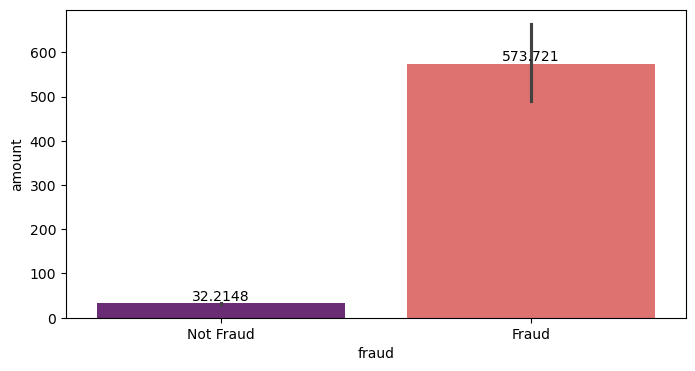

In [427]:
# Analyzing the numerical feature 'Amount'

# Visualizing the target variable 'Fraud'
plt.figure(figsize = (8,4))
b = sns.barplot(x = 'fraud', y = 'amount', data=df, palette = 'magma')
for label in b.containers:
    b.bar_label(label)
plt.xticks([0,1],labels = ['Not Fraud','Fraud'])
plt.show()

<Axes: xlabel='fraud', ylabel='amount'>

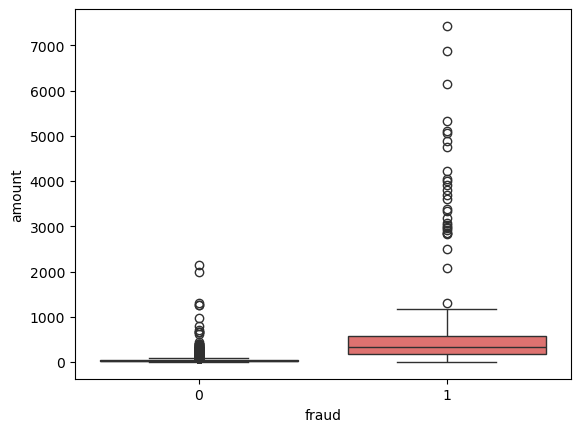

In [428]:
sns.boxplot(x = 'fraud', y= 'amount',data = df,palette = 'magma')

#### From the above barplot & boxplot we observe that the fraudulent transactions were of a higher amount.

In [430]:
# Mapping the customer ids with unique numbers:
print(df['customer'].nunique())
# Creating a mapping dictionary to map each unique customer id to a number from 1 to 4112
unique_ids = df['customer'].unique()
id_map = {id:str(idx+1) for idx, id in enumerate(unique_ids)}
# Replacing the big customers ids with the mapped numbers:
df['customer_id'] = df['customer'].map(id_map)

3515


In [431]:
df.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,customer_id
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,1
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,2
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,3


In [432]:
df = df.drop('customer',axis=1)

In [433]:
df.head(3)

,step,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,customer_id
0,0,'4','M','28007','M348934600','28007','es_transportation',4.55,0,1
1,0,'2','M','28007','M348934600','28007','es_transportation',39.68,0,2
2,0,'4','F','28007','M1823072687','28007','es_transportation',26.89,0,3


In [434]:
df['merchant'].nunique()

48

In [435]:
# Mapping the merchant ids with unique numbers:
print(df['merchant'].nunique())
# Creating a mapping dictionary to map each unique merchant id to a number from 1 to 50
unique_ids = df['merchant'].unique()
id_map = {id:str(idx+1) for idx, id in enumerate(unique_ids)}
# Replacing the big merchant ids with the mapped numbers:
df['merchant_id'] = df['merchant'].map(id_map)
df = df.drop('merchant',axis=1)

48


In [436]:
df.head(3)

,step,age,gender,zipcodeOri,zipMerchant,category,amount,fraud,customer_id,merchant_id
0,0,'4','M','28007','28007','es_transportation',4.55,0,1,1
1,0,'2','M','28007','28007','es_transportation',39.68,0,2,1
2,0,'4','F','28007','28007','es_transportation',26.89,0,3,2


In [437]:
df['category'].nunique()

15

#### Feature Engineering:
##### One Hot Encoding

In [439]:
df = pd.get_dummies(df,columns= ['age','gender','category'])
df.head(5)

,step,zipcodeOri,zipMerchant,amount,fraud,customer_id,merchant_id,age_'0',age_'1',age_'2',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,'28007','28007',4.55,0,1,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,'28007','28007',39.68,0,2,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0,'28007','28007',26.89,0,3,2,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,'28007','28007',17.25,0,4,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,'28007','28007',35.72,0,5,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [440]:
df.columns

Index(['step', 'zipcodeOri', 'zipMerchant', 'amount', 'fraud', 'customer_id',
       'merchant_id', 'age_'0'', 'age_'1'', 'age_'2'', 'age_'3'', 'age_'4'',
       'age_'5'', 'age_'6'', 'age_'U'', 'gender_'E'', 'gender_'F'',
       'gender_'M'', 'gender_'U'', 'category_'es_barsandrestaurants'',
       'category_'es_contents'', 'category_'es_fashion'', 'category_'es_food'',
       'category_'es_health'', 'category_'es_home'',
       'category_'es_hotelservices'', 'category_'es_hyper'',
       'category_'es_leisure'', 'category_'es_otherservices'',
       'category_'es_sportsandtoys'', 'category_'es_tech'',
       'category_'es_transportation'', 'category_'es_travel'',
       'category_'es_wellnessandbeauty''],
      dtype='object')

In [441]:
df[df['zipcodeOri']==df['zipMerchant']]

,step,zipcodeOri,zipMerchant,amount,fraud,customer_id,merchant_id,age_'0',age_'1',age_'2',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,'28007','28007',4.55,0,1,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,'28007','28007',39.68,0,2,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0,'28007','28007',26.89,0,3,2,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,'28007','28007',17.25,0,4,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,'28007','28007',35.72,0,5,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11,'28007','28007',3.92,0,2239,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29996,11,'28007','28007',52.03,0,2649,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29997,11,'28007','28007',32.78,0,1466,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29998,11,'28007','28007',22.55,0,1383,2,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [442]:
# The columns 'zipcodeOri' & 'zipMerchant' are not of any importance and hence dropping the 2 columns:
df = df.drop(['zipcodeOri','zipMerchant'],axis=1)
df.head(4)

,step,amount,fraud,customer_id,merchant_id,age_'0',age_'1',age_'2',age_'3',age_'4',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,4.55,0,1,1,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0,39.68,0,2,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,26.89,0,3,2,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0,17.25,0,4,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


#### Machine Learning: Classification Models

#### The classification models used for this analysis are: Logistic Regression, Decision Tree, Random Forest Classifier, Support Vector Machine

#### To build machine learning models the original data was divided into features(X) and target (y)  and then spilt into train(80%) and test(20%) sets.

In [446]:
# Feature set
X = df.drop('fraud',axis=1)
# Target set
y= df['fraud']
c= X.columns
c

Index(['step', 'amount', 'customer_id', 'merchant_id', 'age_'0'', 'age_'1'',
       'age_'2'', 'age_'3'', 'age_'4'', 'age_'5'', 'age_'6'', 'age_'U'',
       'gender_'E'', 'gender_'F'', 'gender_'M'', 'gender_'U'',
       'category_'es_barsandrestaurants'', 'category_'es_contents'',
       'category_'es_fashion'', 'category_'es_food'', 'category_'es_health'',
       'category_'es_home'', 'category_'es_hotelservices'',
       'category_'es_hyper'', 'category_'es_leisure'',
       'category_'es_otherservices'', 'category_'es_sportsandtoys'',
       'category_'es_tech'', 'category_'es_transportation'',
       'category_'es_travel'', 'category_'es_wellnessandbeauty''],
      dtype='object')

In [447]:
# Dividing into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [448]:
# X_train & X_test are the feature matrices
# Initializing the StandardScaler
scaler = StandardScaler()
# Fitting & Transforming the data
X_train_scaled = scaler.fit_transform(X_train)
# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [449]:
#  Applying SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#### Logistic Regression

In [451]:
# Setting up the hyperparameter grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
# Performing Grid Search with Cross Validation:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [452]:
# Getting the best model and evaluating on test set:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [453]:
# 5 fold cross-validation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_model,X_train_resampled,y_train_resampled,cv=5)
print('Average 5-Fold CV score: {}'.format(round(np.mean(cv_scores),4)),
     ',Standard Deviation: {}'.format(round(np.std(cv_scores),4)))
# Printing the Classification Report
print(classification_report(y_test,y_pred))

Average 5-Fold CV score: 0.9647 ,Standard Deviation: 0.0013
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5907
           1       0.23      0.98      0.37        93

    accuracy                           0.95      6000
   macro avg       0.61      0.96      0.67      6000
weighted avg       0.99      0.95      0.96      6000



In [454]:
# Printing the best hyperparameters:
print('Best hyperparameters:',grid_search.best_params_)

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


In [455]:
y_pred_array = np.array(y_pred)
# Calculating the Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
print(cm)

[[5594  313]
 [   2   91]]


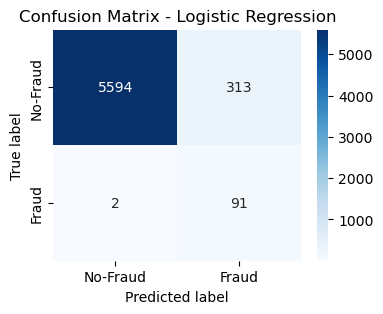

In [456]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No-Fraud', 'Fraud'], 
            yticklabels = ['No-Fraud', 'Fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

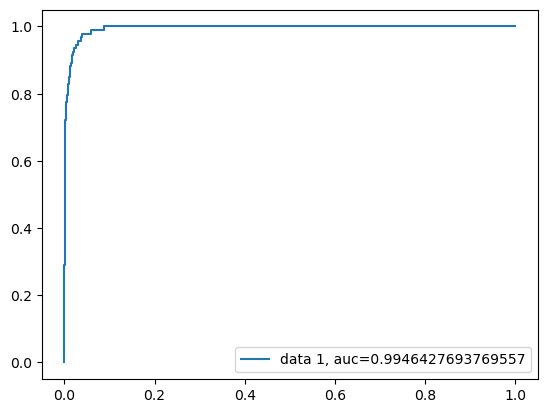

In [457]:
# Plotting ROC & AUC
y_preds_proba_lr = best_model.predict_proba(X_test_scaled)[::,1]
y_pred_proba = y_preds_proba_lr
# Calculating the ROC:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
# Calculating the ROC AUC score:
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Logistic Regression (Most Important Features)

In [459]:
# Feature Selection:
from sklearn.feature_selection import RFE
# The feature matrix is X_train_resampled and target vetor is y_train_resampled
num_features = 4
model = LogisticRegression()
rfe_stand = RFE(estimator = model,n_features_to_select = num_features)
fit_stand = rfe_stand.fit(X_train_resampled,y_train_resampled)
print('Std Model Feature Rankings:',fit_stand.ranking_)
# Calculating score for the selected features
score_stand = fit_stand.score(X_train_resampled, y_train_resampled)
print("Standardized Model Score with selected features is: %f" % score_stand)

Std Model Feature Rankings: [26  1  1 11 21 23 27  5 24 25 28 22 18  2 19 20  8  3  7  1 12 15 14 10
  6 13  4  9  1 17 16]
Standardized Model Score with selected features is: 0.954632


In [460]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=c)
feature_names = np.array(X_train_resampled_df.columns)
print('Most important features (RFE): %s' % feature_names[rfe_stand.support_])

Most important features (RFE): ['amount' 'customer_id' "category_'es_food'"
 "category_'es_transportation'"]


In [461]:
# Creating a new feature matrix with the 4 most important features:
Ximp = X_train_resampled_df[["amount","customer_id","category_'es_food'","category_'es_transportation'"]]
# Dividing into train & test datasets:
X_tr,X_t,y_tr,y_t = train_test_split(Ximp,y_train_resampled,test_size=0.2,stratify=y_train_resampled,random_state=42)

In [462]:
# Setting up the hyperparametr grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
# Performing Grid Search with Cross Validation
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring = 'accuracy')
grid_search.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [463]:
# Getting the best model and evaluating on test set
best_model_imp = grid_search.best_estimator_
y_pred_imp = best_model_imp.predict(X_t)
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_model_imp, X_tr, y_tr, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
# Printing the Classification Report
print(classification_report(y_t,y_pred_imp))

Average 5-Fold CV Score: 0.9537 , Standard deviation: 0.0024
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      4726
           1       0.93      0.99      0.96      4726

    accuracy                           0.96      9452
   macro avg       0.96      0.96      0.96      9452
weighted avg       0.96      0.96      0.96      9452



In [464]:
# Printing the best hyperparameters
print('Best hyperparameters:',grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [465]:
y_pred_imp_array = np.array(y_pred_imp)
# Calculate the confusion matrix
cm = confusion_matrix(y_t, y_pred_imp_array)
print(cm)

[[4398  328]
 [  70 4656]]


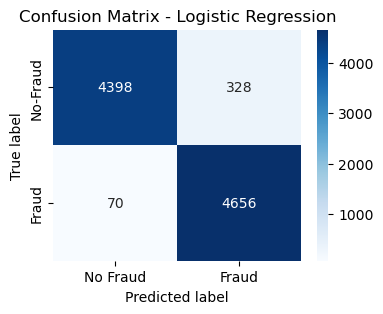

In [466]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=['No Fraud', 'Fraud'],
            yticklabels=['No-Fraud', 'Fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

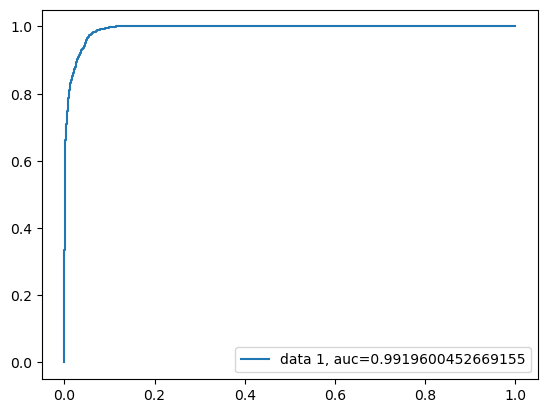

In [467]:
# Plotting ROC & AUC
y_preds_proba_lr_imp = best_model_imp.predict_proba(X_t)[::,1]
y_pred_proba = y_preds_proba_lr_imp
# Calculating the ROC:
fpr, tpr, _ = roc_curve(y_t, y_pred_proba,pos_label = '1')
# Calculating ROC AUC score:
auc = roc_auc_score(y_t, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Decision Tree Classifier

In [469]:
# Feature set
X = df.drop('fraud',axis=1)
# Target set
y= df['fraud']
c= X.columns
c

Index(['step', 'amount', 'customer_id', 'merchant_id', 'age_'0'', 'age_'1'',
       'age_'2'', 'age_'3'', 'age_'4'', 'age_'5'', 'age_'6'', 'age_'U'',
       'gender_'E'', 'gender_'F'', 'gender_'M'', 'gender_'U'',
       'category_'es_barsandrestaurants'', 'category_'es_contents'',
       'category_'es_fashion'', 'category_'es_food'', 'category_'es_health'',
       'category_'es_home'', 'category_'es_hotelservices'',
       'category_'es_hyper'', 'category_'es_leisure'',
       'category_'es_otherservices'', 'category_'es_sportsandtoys'',
       'category_'es_tech'', 'category_'es_transportation'',
       'category_'es_travel'', 'category_'es_wellnessandbeauty''],
      dtype='object')

In [470]:
# Dividing into train & test data:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42,stratify = y)

In [471]:
# X_train & X_test are the feature matrices
# Initializing the StandardScaler
scaler = StandardScaler()
# Fitting & Transforming the data
X_train_scaled = scaler.fit_transform(X_train)
# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [472]:
#  Applying SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [473]:
# Creating a Decision Tree Classifier Object
dt_classifier = DecisionTreeClassifier()
# Defining the hyperparameter grid for grid search
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [1,2,3,4,5,6],
             'max_features':[1,2,3,4,5,6],
             'min_samples_leaf': [1,2,3,4,5,6]
}
# Performing grid search with cross-validation
grid_dt = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train_resampled, y_train_resampled)
# Getting the best model from grid search
best_dt = grid_dt.best_estimator_
# Making predictions on the test data using the best model
y_pred = best_dt.predict(X_test_scaled)
# Generating a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# Printing the best hyperparameters found by grid search
print("Best hyperparameters:", grid_dt.best_params_)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5907
           1       0.17      0.95      0.28        93

    accuracy                           0.93      6000
   macro avg       0.58      0.94      0.62      6000
weighted avg       0.99      0.93      0.95      6000

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 5}


In [474]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_dt, X_train_resampled, y_train_resampled, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 5-Fold CV Score: 0.9512 , Standard deviation: 0.0069


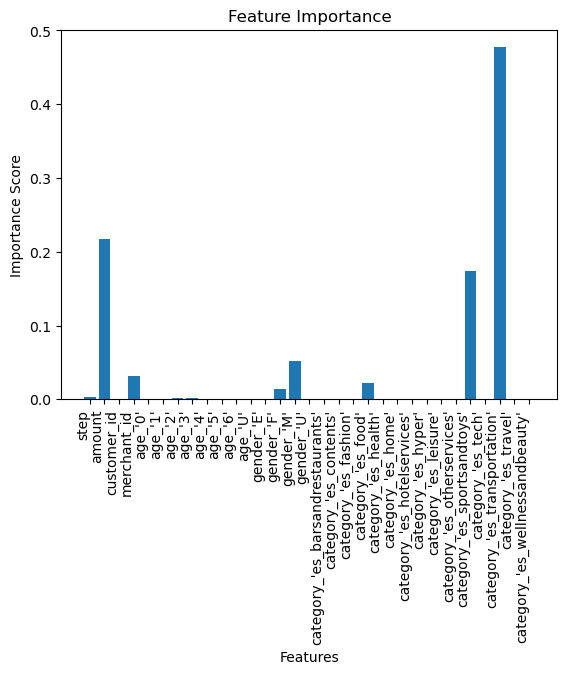

In [475]:
# Important features (Decision Tree):
feature_importances = best_dt.feature_importances_
features = X.columns
plt.bar(features,feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90,ha='right')
plt.show()

#### We observe that the most important features for the Decision Tree Classifier are: Amount, Category Sports & Toys,Transportation.

In [477]:
# Convertining the pandas Series to a NumPy array
y_pred_array = np.array(y_pred)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_array)
print(cm)

[[5468  439]
 [   5   88]]


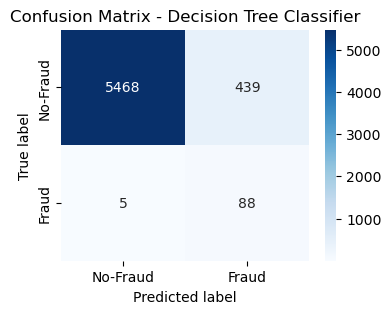

In [478]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No-Fraud', 'Fraud'], 
            yticklabels = ['No-Fraud', 'Fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree Classifier");

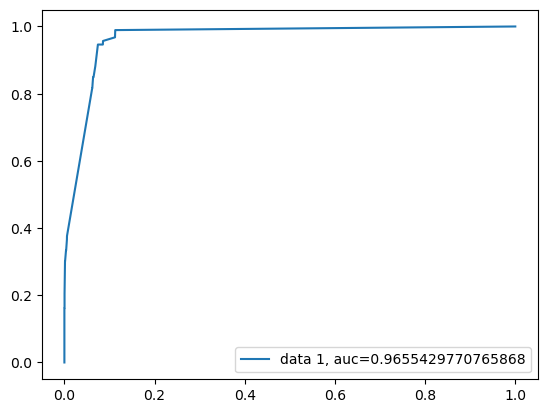

In [479]:
# Plotting ROC & AUC
y_preds_proba_dt = best_dt.predict_proba(X_test_scaled)[::,1]
y_pred_proba = y_preds_proba_dt
# Calculating ROC:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
# Calculating AUC:
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest Classifier

In [481]:
# Dividing into train & test data:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42,stratify = y)

In [482]:
# X_train & X_test are the feature matrices
# Initializing the StandardScaler
scaler = StandardScaler()
# Fitting & Transforming the data
X_train_scaled = scaler.fit_transform(X_train)
# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [483]:
#  Applying SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [484]:
from sklearn.model_selection import RandomizedSearchCV
# Creating a Random Forest Classifier Object
rf_classifier = RandomForestClassifier()
# Defining the hyperparameter grid for grid search
param_rf = {'n_estimators': [50,100,150,200,250],
            'max_features':[1,2,3,4,5,6,7,8,9],
            'max_depth':[1,2,3,4,5,6,7,8,9],
            'criterion':['gini','entropy']
}
# Performing grid search with cross-validation
grid_rf = RandomizedSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train_resampled, y_train_resampled)
# Getting the best model from grid search
best_rf = grid_rf.best_estimator_
# Making predictions on the test data using the best model
y_pred = best_rf.predict(X_test_scaled)
# Generating a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# Printing the best hyperparameters found by grid search
print("Best hyperparameters:", grid_rf.best_params_)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5907
           1       0.20      0.97      0.34        93

    accuracy                           0.94      6000
   macro avg       0.60      0.95      0.65      6000
weighted avg       0.99      0.94      0.96      6000

Best hyperparameters: {'min_samples_leaf': 6, 'max_features': 6, 'max_depth': 6, 'criterion': 'entropy'}


In [485]:
# 5-fold cross-validation
cv_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 5-Fold CV Score: 0.9671 , Standard deviation: 0.0027


In [486]:
# Convert the pandas Series to a NumPy array
y_pred_array = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_array)
print(cm)

[[5557  350]
 [   3   90]]


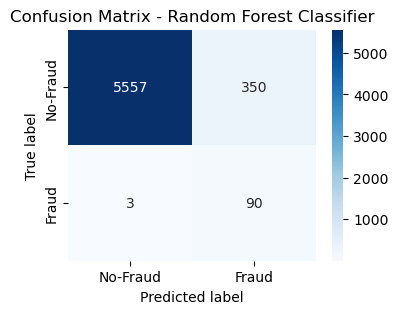

In [487]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No-Fraud', 'Fraud'], 
            yticklabels = ['No-Fraud', 'Fraud'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest Classifier");

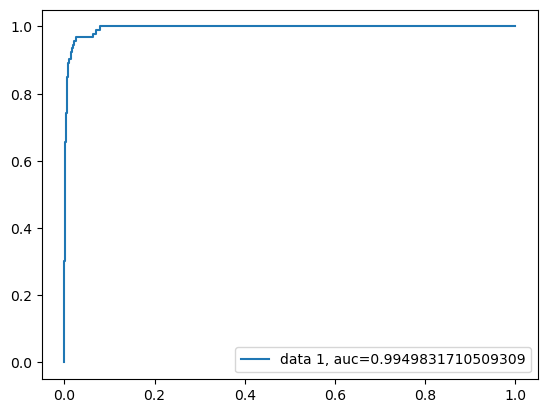

In [488]:
# Plotting ROC & AUC
y_preds_proba_rf = best_rf.predict_proba(X_test_scaled)[::,1]
y_pred_proba = y_preds_proba_rf
# Calculating ROC:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
# Calculating AUC:
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

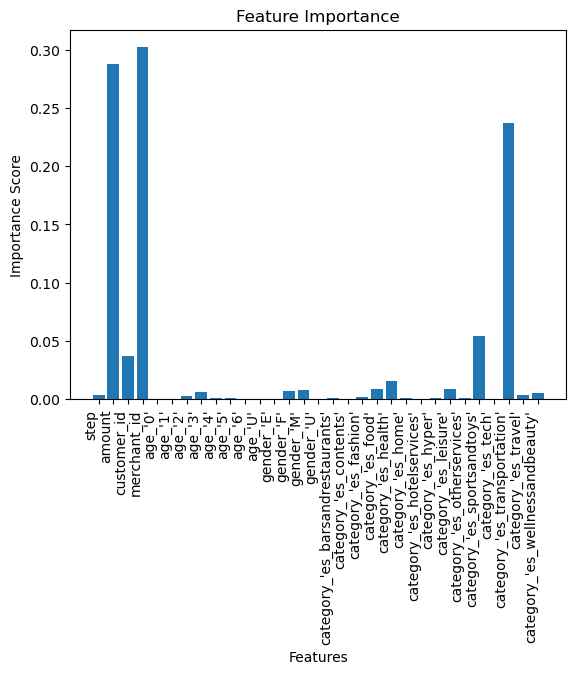

In [489]:
# Important Features (Random Forest Classifier):
feature_importances = best_rf.feature_importances_
features = X.columns
plt.bar(features,feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=90,ha='right')
plt.show()

#### We observe that the most important features for the Random Forest Classifier are: Amount, Merchant_ID, Customer_id, Category SportsSandtoys, Transportation.

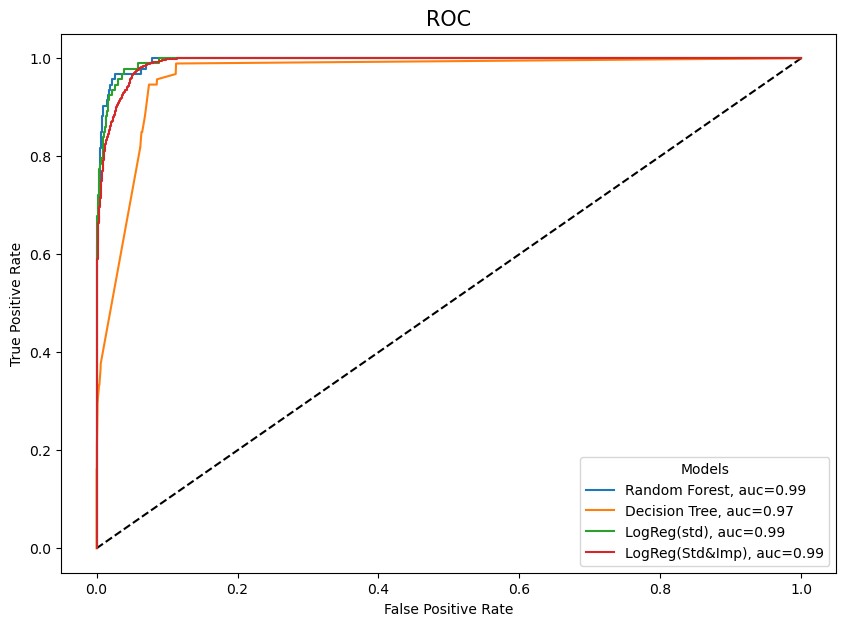

In [491]:
# Comparison of Model Performance
# The metrics used to evaluate performance of the different models: accuracy, precision, recall, f1-score, AUC (ROC), and confusion matrix were employed.
# ROC 
from sklearn import metrics
y_preds_proba_rf = best_rf.predict_proba(X_test_scaled)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,y_preds_proba_rf,pos_label ='1')
auc1 = metrics.roc_auc_score(y_test, y_preds_proba_rf)

y_preds_proba_dt = best_dt.predict_proba(X_test_scaled)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,y_preds_proba_dt,pos_label ='1')
auc2 = metrics.roc_auc_score(y_test, y_preds_proba_dt)

y_preds_proba_lr = best_model.predict_proba(X_test_scaled)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,y_preds_proba_lr,pos_label ='1')
auc3 = metrics.roc_auc_score(y_test, y_preds_proba_lr)

y_preds_proba_lr_imp = best_model_imp.predict_proba(X_t)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_t,  y_preds_proba_lr_imp,pos_label ='1')
auc4 = metrics.roc_auc_score(y_t, y_preds_proba_lr_imp)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg(std), auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="LogReg(Std&Imp), auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()

#### The Receiver Operating Characteristic Curve (ROC) is a plot of the true positive rate against the false positive rate. If the Area Under the Curve (AUC) is high it means the model is good at distinguishing between positive and negative class.The highest AUC is attained for Random Forest Classifier which means that there is a 99.47% chance that the model will be able to distinguish between fraud and non-fraud.

#### Model Performance Comparison Table:

In [577]:
from astropy.table import Table, Column
data_row = [('Logistic Regression','Std.',0.99,0.95,0.96,0.95,0.9946),
             ('Logistic Regression','Imp.',0.96,0.96,0.96,0.96,0.9919),
             ('Decision Tree','Org.',0.99,0.93,0.95,0.93,0.9655),
             ('Random Forest','Org.',0.99,0.94,0.96,0.94,0.9949),
             ]
t = Table(rows=data_row, names=('Model', 'Data', 'Precision', 'Recall', 'F1','Accuracy','AUC'))
print(t)

       Model        Data Precision Recall  F1  Accuracy  AUC  
------------------- ---- --------- ------ ---- -------- ------
Logistic Regression Std.      0.99   0.95 0.96     0.95 0.9946
Logistic Regression Imp.      0.96   0.96 0.96     0.96 0.9919
      Decision Tree Org.      0.99   0.93 0.95     0.93 0.9655
      Random Forest Org.      0.99   0.94 0.96     0.94 0.9949
